In [1]:
! pip install fashion-clip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 137.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 99.6 MB/s eta 0:00:00
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=549276 sha256=c263939badd0d3d36455d6c24e97158d993fa3e8f02728cb6def95c86f116d0b
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [2]:
!pip install ftfy open_clip_torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 51.9 MB/s eta 0:00:00


In [3]:
!pip install transformers==4.50.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.8 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.2
    Uninstalling tokenizers-0.22.2:
      Successfully uninstalled tokenizers-0.22.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.6
    Uninstalling transformers-4.57.6:
      Successfully uninstalled transformers-4.57.6


In [4]:
import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity
from fashion_clip.fashion_clip import FashionCLIP
from transformers import AutoProcessor, AutoModel

# ------------------------------------------------------------------
# 1. Input descriptions
# ------------------------------------------------------------------
descriptions = [
    "white shirt with red dots",                                   # naive
    "white short sleeved shirt with red polka dots",               # fashion-aware
    "round collared regular fit white cotton shirt with micro red polka print"  # fashionista
]

In [5]:
# ============================================================================
# FASHION-CLIP
# ============================================================================
print("=== Fashion-CLIP ===")
fclip = FashionCLIP('fashion-clip')
fclip_embs = fclip.encode_text(descriptions, batch_size=3)
fclip_embs = fclip_embs / np.linalg.norm(fclip_embs, axis=-1, keepdims=True)

fclip_sim_nm = cosine_similarity([fclip_embs[0]], [fclip_embs[1]])[0][0]
fclip_sim_nf = cosine_similarity([fclip_embs[0]], [fclip_embs[2]])[0][0]
fclip_sim_mf = cosine_similarity([fclip_embs[1]], [fclip_embs[2]])[0][0]
fclip_avg = np.mean([fclip_sim_nm, fclip_sim_nf, fclip_sim_mf])

print(f"naive ↔ medium        : {fclip_sim_nm:.4f}")
print(f"naive ↔ fashionista   : {fclip_sim_nf:.4f}")
print(f"medium ↔ fashionista  : {fclip_sim_mf:.4f}")
print(f"AVERAGE               : {fclip_avg:.4f}")
print()

=== Fashion-CLIP ===


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

naive ↔ medium        : 0.9031
naive ↔ fashionista   : 0.8819
medium ↔ fashionista  : 0.8524
AVERAGE               : 0.8791



In [6]:
# ============================================================================
# MARQO-FASHIONSIGLIP (Your working syntax)
# ============================================================================
print("=== Marqo-FashionSigLIP ===")
model = AutoModel.from_pretrained("Marqo/marqo-fashionSigLIP", trust_remote_code=True)
processor = AutoProcessor.from_pretrained("Marqo/marqo-fashionSigLIP", trust_remote_code=True)
model.eval()

inputs = processor(text=descriptions, padding=True, truncation=True, return_tensors="pt")

with torch.no_grad():
    marqo_embs = model.get_text_features(inputs["input_ids"], normalize=True).cpu().numpy()

marqo_sim_nm = cosine_similarity([marqo_embs[0]], [marqo_embs[1]])[0][0]
marqo_sim_nf = cosine_similarity([marqo_embs[0]], [marqo_embs[2]])[0][0]
marqo_sim_mf = cosine_similarity([marqo_embs[1]], [marqo_embs[2]])[0][0]
marqo_avg = np.mean([marqo_sim_nm, marqo_sim_nf, marqo_sim_mf])

print(f"naive ↔ medium        : {marqo_sim_nm:.4f}")
print(f"naive ↔ fashionista   : {marqo_sim_nf:.4f}")
print(f"medium ↔ fashionista  : {marqo_sim_mf:.4f}")
print(f"AVERAGE               : {marqo_avg:.4f}")
print()

=== Marqo-FashionSigLIP ===


config.json:   0%|          | 0.00/302 [00:00<?, ?B/s]

marqo_fashionSigLIP.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Marqo/marqo-fashionSigLIP:
- marqo_fashionSigLIP.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
You are using a model of type siglip to instantiate a model of type . This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/813M [00:00<?, ?B/s]

open_clip_config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

open_clip_model.safetensors:   0%|          | 0.00/813M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/516 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

naive ↔ medium        : 0.9251
naive ↔ fashionista   : 0.7700
medium ↔ fashionista  : 0.8197
AVERAGE               : 0.8382



In [7]:
# ============================================================================
# COMPARISON
# ============================================================================
print("=== COMPARISON ===")
print(f"Fashion-CLIP average:     {fclip_avg:.4f}")
print(f"Marqo-FashionSigLIP avg:  {marqo_avg:.4f}")
print(f"Difference:               {abs(fclip_avg - marqo_avg):.4f}")
better = "Fashion-CLIP" if fclip_avg > marqo_avg else "Marqo-FashionSigLIP"
print(f"WINNER (higher avg better): {better}")

=== COMPARISON ===
Fashion-CLIP average:     0.8791
Marqo-FashionSigLIP avg:  0.8382
Difference:               0.0409
WINNER (higher avg better): Fashion-CLIP


In [8]:
# ============================================================================
# EXAMPLE 2:
# ============================================================================
print("TEST 2: ASYMMETRIC HEMLINE DRESS")
print("="*50)

descriptions_2 = [
    "black dress",                                           # naive
    "black asymmetric hemline dress",                        # fashion-aware
    "jet black matte crepe dress, diagonal asymmetric hemline with cascading layers, modern minimalist cut"  # fashionista
]

# FASHION-CLIP
fclip = FashionCLIP('fashion-clip')
fclip_embs_2 = fclip.encode_text(descriptions_2, batch_size=3)
fclip_embs_2 = fclip_embs_2 / np.linalg.norm(fclip_embs_2, axis=-1, keepdims=True)

fclip_sim_nm_2 = cosine_similarity([fclip_embs_2[0]], [fclip_embs_2[1]])[0][0]
fclip_sim_nf_2 = cosine_similarity([fclip_embs_2[0]], [fclip_embs_2[2]])[0][0]
fclip_sim_mf_2 = cosine_similarity([fclip_embs_2[1]], [fclip_embs_2[2]])[0][0]
fclip_avg_2 = np.mean([fclip_sim_nm_2, fclip_sim_nf_2, fclip_sim_mf_2])

print(f"=== Fashion-CLIP ===")
print(f"naive ↔ medium        : {fclip_sim_nm_2:.4f}")
print(f"naive ↔ fashionista   : {fclip_sim_nf_2:.4f}")
print(f"medium ↔ fashionista  : {fclip_sim_mf_2:.4f}")
print(f"AVERAGE               : {fclip_avg_2:.4f}")
print()


TEST 2: ASYMMETRIC HEMLINE DRESS


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|██████████| 1/1 [00:00<00:00, 57.35it/s]

=== Fashion-CLIP ===
naive ↔ medium        : 0.8216
naive ↔ fashionista   : 0.6588
medium ↔ fashionista  : 0.8198
AVERAGE               : 0.7667



In [9]:
# MARQO-FASHIONSIGLIP
model = AutoModel.from_pretrained("Marqo/marqo-fashionSigLIP", trust_remote_code=True)
processor = AutoProcessor.from_pretrained("Marqo/marqo-fashionSigLIP", trust_remote_code=True)
model.eval()

inputs_2 = processor(text=descriptions_2, padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    marqo_embs_2 = model.get_text_features(inputs_2["input_ids"], normalize=True).cpu().numpy()

marqo_sim_nm_2 = cosine_similarity([marqo_embs_2[0]], [marqo_embs_2[1]])[0][0]
marqo_sim_nf_2 = cosine_similarity([marqo_embs_2[0]], [marqo_embs_2[2]])[0][0]
marqo_sim_mf_2 = cosine_similarity([marqo_embs_2[1]], [marqo_embs_2[2]])[0][0]
marqo_avg_2 = np.mean([marqo_sim_nm_2, marqo_sim_nf_2, marqo_sim_mf_2])

print(f"=== Marqo-FashionSigLIP ===")
print(f"naive ↔ medium        : {marqo_sim_nm_2:.4f}")
print(f"naive ↔ fashionista   : {marqo_sim_nf_2:.4f}")
print(f"medium ↔ fashionista  : {marqo_sim_mf_2:.4f}")
print(f"AVERAGE               : {marqo_avg_2:.4f}")
print()

You are using a model of type siglip to instantiate a model of type . This is not supported for all configurations of models and can yield errors.


=== Marqo-FashionSigLIP ===
naive ↔ medium        : 0.7603
naive ↔ fashionista   : 0.6240
medium ↔ fashionista  : 0.5152
AVERAGE               : 0.6332



In [10]:
import pandas as pd

df = pd.read_csv("/content/women_kurta_suit_sets_tags.csv")
df.head()

,product_id,standardize_type_updated,normalised_name,confidence,category
0,466708619_pink,shop the vibe,magenta kurta set,0.98,Women - Kurta Suit Sets
1,466708619_pink,shop the vibe,gold embroidered kurta,0.97,Women - Kurta Suit Sets
2,466708619_pink,shop the vibe,three quarter sleeve kurta,0.96,Women - Kurta Suit Sets
3,466708619_pink,shop the vibe,traditional festive wear,0.95,Women - Kurta Suit Sets
4,466708619_pink,shop the vibe,ethnic kurta suit set,0.94,Women - Kurta Suit Sets


In [11]:
df.shape

(201740, 5)

In [12]:
len(df['normalised_name'].unique())

10510

In [13]:
raw_tags = (
    df["normalised_name"]
    .dropna()
    .astype(str)
    .str.strip()
    .unique()
    .tolist()
)

In [14]:
import re

def normalize_phrase(text):
    text = text.lower().strip()
    text = re.sub(r"\s+", " ", text)   # normalize spaces
    return text

normalized_tags = [normalize_phrase(t) for t in raw_tags]

In [15]:
from fashion_clip.fashion_clip import FashionCLIP
import torch
import numpy as np

fclip = FashionCLIP('fashion-clip')
fclip_text_embeddings = fclip.encode_text(normalized_tags, batch_size=32)
fclip_text_embeddings = fclip_text_embeddings / np.linalg.norm(
    fclip_text_embeddings, ord=2, axis=-1, keepdims=True
)

Map:   0%|          | 0/10509 [00:00<?, ? examples/s]

329it [00:20, 15.79it/s]                         


In [16]:
import torch
from transformers import AutoModel, AutoProcessor


model = AutoModel.from_pretrained(
    "Marqo/marqo-fashionSigLIP",
    trust_remote_code=True
)

processor = AutoProcessor.from_pretrained(
    "Marqo/marqo-fashionSigLIP",
    trust_remote_code=True
)

model.eval()


You are using a model of type siglip to instantiate a model of type . This is not supported for all configurations of models and can yield errors.


MarqoFashionSigLIP(
  (model): CustomTextCLIP(
    (visual): TimmModel(
      (trunk): VisionTransformer(
        (patch_embed): PatchEmbed(
          (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
          (norm): Identity()
        )
        (pos_drop): Dropout(p=0.0, inplace=False)
        (patch_drop): Identity()
        (norm_pre): Identity()
        (blocks): Sequential(
          (0): Block(
            (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
            (attn): Attention(
              (qkv): Linear(in_features=768, out_features=2304, bias=True)
              (q_norm): Identity()
              (k_norm): Identity()
              (attn_drop): Dropout(p=0.0, inplace=False)
              (norm): Identity()
              (proj): Linear(in_features=768, out_features=768, bias=True)
              (proj_drop): Dropout(p=0.0, inplace=False)
            )
            (ls1): Identity()
            (drop_path1): Identity()
            (norm2): LayerNo

In [17]:
import numpy as np

all_embeddings = []

BATCH_SIZE = 32  # safe on CPU

for i in range(0, len(normalized_tags), BATCH_SIZE):
    batch_texts = normalized_tags[i : i + BATCH_SIZE]

    inputs = processor(
        text=batch_texts,
        padding=True,
        truncation=True,
        return_tensors="pt"
    )

    with torch.no_grad():
        batch_embeddings = model.get_text_features(
            inputs["input_ids"],
            normalize=True
        )

    all_embeddings.append(batch_embeddings.cpu().numpy())

text_embeddings = np.vstack(all_embeddings)

In [18]:
print(f"Fashion-CLIP embeddings shape: {fclip_text_embeddings.shape}")
print(f"Marqo embeddings shape: {text_embeddings.shape}")
print(f"Number of tags: {len(normalized_tags)}")

Fashion-CLIP embeddings shape: (10509, 512)
Marqo embeddings shape: (10509, 768)
Number of tags: 10509


In [19]:
# ============================================================================
# QUERY TEXT (PLACEHOLDER - CHANGE THIS!)
# ============================================================================
# Enter your test query here:
QUERY_TEXT = "red kurta"  # ← CHANGE THIS TO YOUR TEST TEXT

print(f"\n🔍 QUERY: '{QUERY_TEXT}'")
print("="*80)


🔍 QUERY: 'red kurta'


In [20]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
# ============================================================================
# FASHION-CLIP 2.0 TOP 10 CLOSEST (FIXED)
# ============================================================================
print("\n1. FASHION-CLIP 2.0 RESULTS")
print("-" * 60)

# Encode query (FIX: add batch_size=1)
fclip_query_emb = fclip.encode_text([QUERY_TEXT], batch_size=1)[0]
fclip_query_emb = fclip_query_emb / np.linalg.norm(fclip_query_emb)

# Compute distances
fclip_euclidean_dist = euclidean_distances([fclip_query_emb], fclip_text_embeddings)[0]
fclip_manhattan_dist = manhattan_distances([fclip_query_emb], fclip_text_embeddings)[0]
fclip_cosine_sim = cosine_similarity([fclip_query_emb], fclip_text_embeddings)[0]

# Get top 10 closest indices
top10_indices = np.argsort(fclip_euclidean_dist)[:10]

print("Rank | Euclidean | Manhattan | Cosine Sim | Tag")
print("-" * 60)
for rank, idx in enumerate(top10_indices, 1):
    print(f"{rank:4d} | {fclip_euclidean_dist[idx]:9.4f} | {fclip_manhattan_dist[idx]:9.4f} | "
          f"{fclip_cosine_sim[idx]:9.4f} | {normalized_tags[idx]}")

print(f"\n📊 Fashion-CLIP Summary:")
print(f"  Top 1 cosine similarity: {fclip_cosine_sim[top10_indices[0]]:.4f}")
print(f"  Top 10 average cosine similarity: {np.mean(fclip_cosine_sim[top10_indices]):.4f}")



1. FASHION-CLIP 2.0 RESULTS
------------------------------------------------------------


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|██████████| 1/1 [00:00<00:00, 23.73it/s]

Rank | Euclidean | Manhattan | Cosine Sim | Tag
------------------------------------------------------------
   1 |    0.1832 |    3.1852 |    0.9832 | classic red kurta
   2 |    0.2072 |    3.5873 |    0.9785 | elegant red kurta
   3 |    0.2079 |    3.7490 |    0.9784 | bright red kurta
   4 |    0.2119 |    3.7103 |    0.9776 | vibrant red kurta
   5 |    0.2135 |    3.7940 |    0.9772 | red traditional kurta
   6 |    0.2189 |    3.9181 |    0.9760 | red kurta for party
   7 |    0.2234 |    4.0221 |    0.9750 | red ethnic kurta
   8 |    0.2240 |    3.9910 |    0.9749 | comfortable red kurta
   9 |    0.2248 |    3.9358 |    0.9747 | red festive kurta
  10 |    0.2296 |    4.1271 |    0.9736 | traditional red kurta

📊 Fashion-CLIP Summary:
  Top 1 cosine similarity: 0.9832
  Top 10 average cosine similarity: 0.9769


In [22]:
# ============================================================================
# MARQO-FASHIONSIGLIP TOP 10 CLOSEST
# ============================================================================
print("\n\n2. MARQO-FASHIONSIGLIP RESULTS")
print("-" * 60)

# Encode query with Marqo
inputs = processor(text=[QUERY_TEXT], padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    marqo_query_emb = model.get_text_features(inputs["input_ids"], normalize=True).cpu().numpy()[0]

# Compute distances
marqo_euclidean_dist = euclidean_distances([marqo_query_emb], text_embeddings)[0]
marqo_manhattan_dist = manhattan_distances([marqo_query_emb], text_embeddings)[0]
marqo_cosine_sim = cosine_similarity([marqo_query_emb], text_embeddings)[0]

# Get top 10 closest indices
marqo_top10_indices = np.argsort(marqo_euclidean_dist)[:10]

print("Rank | Euclidean | Manhattan | Cosine Sim | Tag")
print("-" * 60)
for rank, idx in enumerate(marqo_top10_indices, 1):
    print(f"{rank:4d} | {marqo_euclidean_dist[idx]:9.4f} | {marqo_manhattan_dist[idx]:9.4f} | "
          f"{marqo_cosine_sim[idx]:9.4f} | {normalized_tags[idx]}")

print(f"\n📊 Marqo-FashionSigLIP Summary:")
print(f"  Top 1 cosine similarity: {marqo_cosine_sim[marqo_top10_indices[0]]:.4f}")
print(f"  Top 10 average cosine similarity: {np.mean(marqo_cosine_sim[marqo_top10_indices]):.4f}")



2. MARQO-FASHIONSIGLIP RESULTS
------------------------------------------------------------
Rank | Euclidean | Manhattan | Cosine Sim | Tag
------------------------------------------------------------
   1 |    0.3373 |    7.4415 |    0.9431 | red kurta set
   2 |    0.3735 |    8.2191 |    0.9303 | white kurta set
   3 |    0.3821 |    8.4177 |    0.9270 | pink kurta set
   4 |    0.3948 |    8.5761 |    0.9221 | teal green kurta
   5 |    0.3979 |    8.8581 |    0.9208 | blue yoke kurta
   6 |    0.4032 |    8.8900 |    0.9187 | olive green kurta
   7 |    0.4054 |    8.8840 |    0.9178 | magenta kurta
   8 |    0.4071 |    8.9505 |    0.9171 | light green kurta
   9 |    0.4091 |    9.0180 |    0.9163 | blue kurta set
  10 |    0.4095 |    9.1290 |    0.9162 | orange kurta set

📊 Marqo-FashionSigLIP Summary:
  Top 1 cosine similarity: 0.9431
  Top 10 average cosine similarity: 0.9229


In [23]:
# ============================================================================
# QUERY 2
# ============================================================================
print("\n" + "="*80)
print("🔍 QUERY 2")
print("="*80)
QUERY_TEXT_2 = "anarkali set"

print(f"Query: '{QUERY_TEXT_2}'")
print("\n1. FASHION-CLIP 2.0 RESULTS")
print("-" * 60)

# Encode query (batch_size=1 fix)
fclip_query_emb_2 = fclip.encode_text([QUERY_TEXT_2], batch_size=1)[0]
fclip_query_emb_2 = fclip_query_emb_2 / np.linalg.norm(fclip_query_emb_2)

# Compute distances
fclip_euclidean_dist_2 = euclidean_distances([fclip_query_emb_2], fclip_text_embeddings)[0]
fclip_manhattan_dist_2 = manhattan_distances([fclip_query_emb_2], fclip_text_embeddings)[0]
fclip_cosine_sim_2 = cosine_similarity([fclip_query_emb_2], fclip_text_embeddings)[0]

# Top 10
top10_indices_2 = np.argsort(fclip_euclidean_dist_2)[:10]

print("Rank | Euclidean | Manhattan | Cosine Sim | Tag")
print("-" * 60)
for rank, idx in enumerate(top10_indices_2, 1):
    print(f"{rank:4d} | {fclip_euclidean_dist_2[idx]:9.4f} | {fclip_manhattan_dist_2[idx]:9.4f} | "
          f"{fclip_cosine_sim_2[idx]:9.4f} | {normalized_tags[idx]}")

print(f"\n📊 Fashion-CLIP Summary:")
print(f"  Top 1 cosine: {fclip_cosine_sim_2[top10_indices_2[0]]:.4f}")
print(f"  Top 10 avg cosine: {np.mean(fclip_cosine_sim_2[top10_indices_2]):.4f}")


🔍 QUERY 2
Query: 'anarkali set'

1. FASHION-CLIP 2.0 RESULTS
------------------------------------------------------------


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|██████████| 1/1 [00:00<00:00, 76.01it/s]

Rank | Euclidean | Manhattan | Cosine Sim | Tag
------------------------------------------------------------
   1 |    0.1975 |    3.5430 |    0.9805 | elegant anarkali set
   2 |    0.2115 |    3.8530 |    0.9776 | traditional anarkali set
   3 |    0.2132 |    3.7540 |    0.9773 | anarkali suit set
   4 |    0.2331 |    4.1521 |    0.9728 | festive anarkali set
   5 |    0.2613 |    4.6230 |    0.9659 | flowy anarkali set
   6 |    0.2855 |    4.9017 |    0.9593 | flared anarkali set
   7 |    0.2948 |    5.1694 |    0.9566 | anarkali kurta set
   8 |    0.2971 |    5.2851 |    0.9559 | floor length anarkali set
   9 |    0.3106 |    5.4463 |    0.9518 | anarkali style
  10 |    0.3124 |    5.6270 |    0.9512 | modest anarkali set

📊 Fashion-CLIP Summary:
  Top 1 cosine: 0.9805
  Top 10 avg cosine: 0.9649


In [24]:
print("\n2. MARQO-FASHIONSIGLIP RESULTS")
print("-" * 60)

# Marqo query
inputs_2 = processor(text=[QUERY_TEXT_2], padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    marqo_query_emb_2 = model.get_text_features(inputs_2["input_ids"], normalize=True).cpu().numpy()[0]

marqo_euclidean_dist_2 = euclidean_distances([marqo_query_emb_2], text_embeddings)[0]
marqo_manhattan_dist_2 = manhattan_distances([marqo_query_emb_2], text_embeddings)[0]
marqo_cosine_sim_2 = cosine_similarity([marqo_query_emb_2], text_embeddings)[0]

marqo_top10_indices_2 = np.argsort(marqo_euclidean_dist_2)[:10]

print("Rank | Euclidean | Manhattan | Cosine Sim | Tag")
print("-" * 60)
for rank, idx in enumerate(marqo_top10_indices_2, 1):
    print(f"{rank:4d} | {marqo_euclidean_dist_2[idx]:9.4f} | {marqo_manhattan_dist_2[idx]:9.4f} | "
          f"{marqo_cosine_sim_2[idx]:9.4f} | {normalized_tags[idx]}")

print(f"\n📊 Marqo Summary:")
print(f"  Top 1 cosine: {marqo_cosine_sim_2[marqo_top10_indices_2[0]]:.4f}")
print(f"  Top 10 avg cosine: {np.mean(marqo_cosine_sim_2[marqo_top10_indices_2]):.4f}")


2. MARQO-FASHIONSIGLIP RESULTS
------------------------------------------------------------
Rank | Euclidean | Manhattan | Cosine Sim | Tag
------------------------------------------------------------
   1 |    0.4873 |   10.7156 |    0.8813 | traditional anarkali set
   2 |    0.5127 |   11.4986 |    0.8686 | festive anarkali set
   3 |    0.5153 |   11.3382 |    0.8672 | anarkali kurta
   4 |    0.5159 |   11.3940 |    0.8669 | ethnic kurta set
   5 |    0.5246 |   11.4542 |    0.8624 | vibrant kurta set
   6 |    0.5279 |   11.6749 |    0.8607 | magenta ethnic set
   7 |    0.5478 |   12.1191 |    0.8500 | green anarkali kurta
   8 |    0.5508 |   12.1215 |    0.8483 | orange kurta set
   9 |    0.5555 |   12.2444 |    0.8457 | pink kurta set
  10 |    0.5576 |   12.3956 |    0.8446 | white pant ethnic set

📊 Marqo Summary:
  Top 1 cosine: 0.8813
  Top 10 avg cosine: 0.8596


In [26]:
# ============================================================================
# QUERY 3:
# ============================================================================
print("\n" + "="*80)
print("🔍 QUERY 3")
print("="*80)
QUERY_TEXT_3 = "Summer Wear"

print(f"Query: '{QUERY_TEXT_3}'")
print("\n1. FASHION-CLIP 2.0 RESULTS")
print("-" * 60)

# Encode query
fclip_query_emb_3 = fclip.encode_text([QUERY_TEXT_3], batch_size=1)[0]
fclip_query_emb_3 = fclip_query_emb_3 / np.linalg.norm(fclip_query_emb_3)

# Distances
fclip_euclidean_dist_3 = euclidean_distances([fclip_query_emb_3], fclip_text_embeddings)[0]
fclip_manhattan_dist_3 = manhattan_distances([fclip_query_emb_3], fclip_text_embeddings)[0]
fclip_cosine_sim_3 = cosine_similarity([fclip_query_emb_3], fclip_text_embeddings)[0]

top10_indices_3 = np.argsort(fclip_euclidean_dist_3)[:10]

print("Rank | Euclidean | Manhattan | Cosine Sim | Tag")
print("-" * 60)
for rank, idx in enumerate(top10_indices_3, 1):
    print(f"{rank:4d} | {fclip_euclidean_dist_3[idx]:9.4f} | {fclip_manhattan_dist_3[idx]:9.4f} | "
          f"{fclip_cosine_sim_3[idx]:9.4f} | {normalized_tags[idx]}")

print(f"\n📊 Fashion-CLIP Summary:")
print(f"  Top 1 cosine: {fclip_cosine_sim_3[top10_indices_3[0]]:.4f}")
print(f"  Top 10 avg cosine: {np.mean(fclip_cosine_sim_3[top10_indices_3]):.4f}")


🔍 QUERY 3
Query: 'Summer Wear'

1. FASHION-CLIP 2.0 RESULTS
------------------------------------------------------------


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|██████████| 1/1 [00:00<00:00, 67.85it/s]

Rank | Euclidean | Manhattan | Cosine Sim | Tag
------------------------------------------------------------
   1 |    0.0000 |    0.0000 |    1.0000 | summer wear
   2 |    0.4171 |    7.3195 |    0.9130 | summer party wear
   3 |    0.4261 |    7.4243 |    0.9092 | light summer wear
   4 |    0.4275 |    7.6364 |    0.9086 | summer friendly outfit
   5 |    0.4549 |    8.3211 |    0.8965 | vacation wear
   6 |    0.4555 |    7.8845 |    0.8963 | summer outfit
   7 |    0.4581 |    8.1005 |    0.8951 | summer festive wear
   8 |    0.4645 |    8.2081 |    0.8921 | stylish summer outfit
   9 |    0.4686 |    8.3499 |    0.8902 | lightweight summer wear
  10 |    0.4706 |    8.4441 |    0.8892 | comfortable summer wear

📊 Fashion-CLIP Summary:
  Top 1 cosine: 1.0000
  Top 10 avg cosine: 0.9090


In [27]:
print("\n2. MARQO-FASHIONSIGLIP RESULTS")
print("-" * 60)

# Marqo query
inputs_3 = processor(text=[QUERY_TEXT_3], padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    marqo_query_emb_3 = model.get_text_features(inputs_3["input_ids"], normalize=True).cpu().numpy()[0]

marqo_euclidean_dist_3 = euclidean_distances([marqo_query_emb_3], text_embeddings)[0]
marqo_manhattan_dist_3 = manhattan_distances([marqo_query_emb_3], text_embeddings)[0]
marqo_cosine_sim_3 = cosine_similarity([marqo_query_emb_3], text_embeddings)[0]

marqo_top10_indices_3 = np.argsort(marqo_euclidean_dist_3)[:10]

print("Rank | Euclidean | Manhattan | Cosine Sim | Tag")
print("-" * 60)
for rank, idx in enumerate(marqo_top10_indices_3, 1):
    print(f"{rank:4d} | {marqo_euclidean_dist_3[idx]:9.4f} | {marqo_manhattan_dist_3[idx]:9.4f} | "
          f"{marqo_cosine_sim_3[idx]:9.4f} | {normalized_tags[idx]}")

print(f"\n📊 Marqo Summary:")
print(f"  Top 1 cosine: {marqo_cosine_sim_3[marqo_top10_indices_3[0]]:.4f}")
print(f"  Top 10 avg cosine: {np.mean(marqo_cosine_sim_3[marqo_top10_indices_3]):.4f}")


2. MARQO-FASHIONSIGLIP RESULTS
------------------------------------------------------------
Rank | Euclidean | Manhattan | Cosine Sim | Tag
------------------------------------------------------------
   1 |    0.5755 |   12.8556 |    0.8344 | floral print summer wear
   2 |    0.5767 |   12.4684 |    0.8337 | summer party wear kurta
   3 |    0.6262 |   13.5956 |    0.8039 | maroon party wear kurta
   4 |    0.6302 |   13.8520 |    0.8014 | party wear lavender kurta
   5 |    0.6307 |   13.6411 |    0.8011 | occasion wear kurta
   6 |    0.6369 |   13.9090 |    0.7972 | summer wear kurta set
   7 |    0.6383 |   14.0114 |    0.7963 | occasion wear kurta set
   8 |    0.6409 |   13.8142 |    0.7946 | elegant party wear kurta
   9 |    0.6458 |   14.1150 |    0.7915 | luxuriou wedding wear
  10 |    0.6517 |   14.1257 |    0.7877 | festive wear kurta

📊 Marqo Summary:
  Top 1 cosine: 0.8344
  Top 10 avg cosine: 0.8042


In [28]:
!pip install hdbscan

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.



🎯 HDBSCAN + DBCV (Density-Based Clustering)

Fashion-CLIP 2.0:
  DBCV Score: 0.1440
  Clusters: 2484
  Noise: 2915

Marqo-FashionSigLIP:
  DBCV Score: 0.1091
  Clusters: 1869
  Noise: 3920

🏆 DBCV WINNER: FCLIP 🏆

📊 Interpretation:
  > 0.70: Excellent
  0.40-0.70: Good
  0.10-0.40: Fair
✅ Plot saved: hdbscan_fixed.png


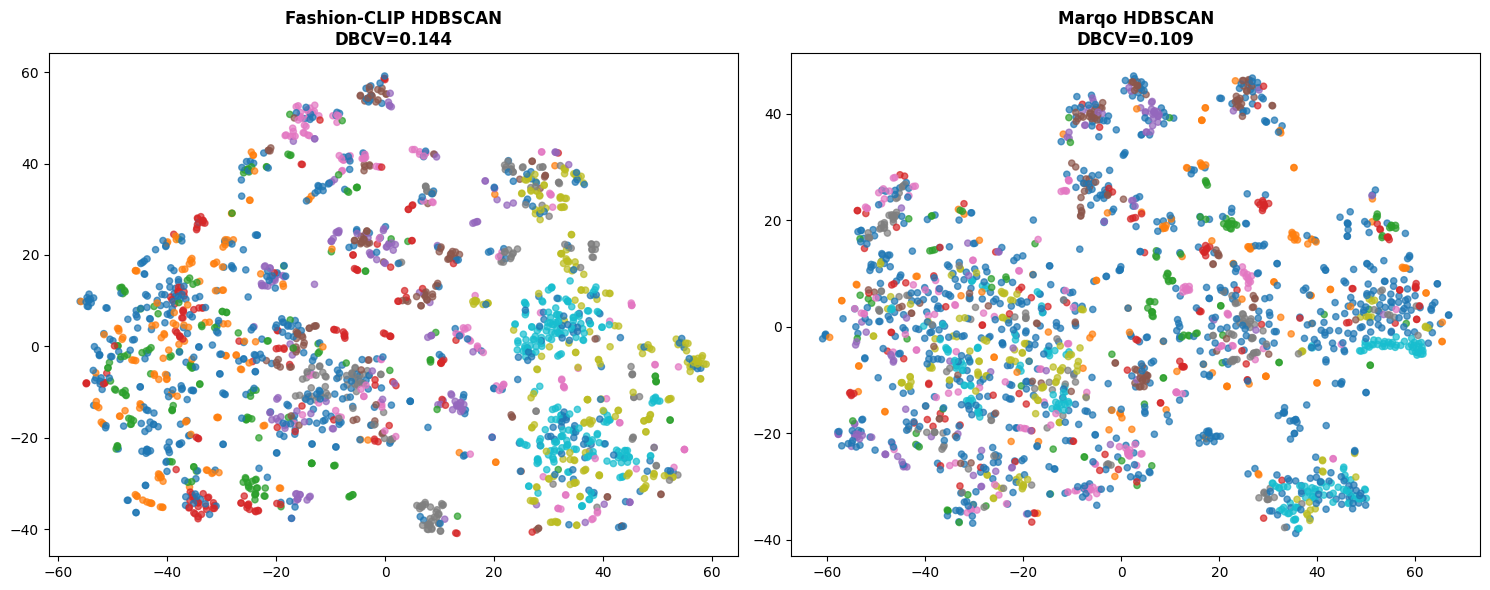

In [29]:
import hdbscan
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# ============================================================================
# HDBSCAN + DBCV (SIMPLIFIED - FIXED)
# ============================================================================
print("\n" + "="*80)
print("🎯 HDBSCAN + DBCV (Density-Based Clustering)")
print("="*80)


hdbscan_fclip = hdbscan.HDBSCAN(
    min_cluster_size=2,
    min_samples=1,
    metric='euclidean',
    cluster_selection_method='eom',
    gen_min_span_tree=True # Explicitly set
)
fclip_labels = hdbscan_fclip.fit(fclip_text_embeddings)
fclip_dbcv = hdbscan_fclip.relative_validity_

hdbscan_maro = hdbscan.HDBSCAN(
    min_cluster_size=2,
    min_samples=1,
    metric='euclidean',
    cluster_selection_method='eom',
    gen_min_span_tree=True # Explicitly set
)
marqo_labels = hdbscan_maro.fit(text_embeddings)
marqo_dbcv = hdbscan_maro.relative_validity_

print(f"\nFashion-CLIP 2.0:")
print(f"  DBCV Score: {fclip_dbcv:.4f}")
print(f"  Clusters: {len(set(fclip_labels.labels_)) - (1 if -1 in fclip_labels.labels_ else 0)}")
print(f"  Noise: {list(fclip_labels.labels_).count(-1)}")

print(f"\nMarqo-FashionSigLIP:")
print(f"  DBCV Score: {marqo_dbcv:.4f}")
print(f"  Clusters: {len(set(marqo_labels.labels_)) - (1 if -1 in marqo_labels.labels_ else 0)}")
print(f"  Noise: {list(marqo_labels.labels_).count(-1)}")

winner = "FCLIP 🏆" if fclip_dbcv > marqo_dbcv else "Marqo 🏆"
print(f"\n🏆 DBCV WINNER: {winner}")

print(f"\n📊 Interpretation:")
print(f"  > 0.70: Excellent")
print(f"  0.40-0.70: Good")
print(f"  0.10-0.40: Fair")

# ============================================================================
# VISUALIZATION (Optional - Fixed)
# ============================================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
fclip_2d = tsne.fit_transform(fclip_text_embeddings[:2000])  # Subsample for speed
marqo_2d = tsne.fit_transform(text_embeddings[:2000])

ax1.scatter(fclip_2d[:, 0], fclip_2d[:, 1], c=fclip_labels.labels_[:2000],
            cmap='tab10', alpha=0.7, s=20)
ax1.set_title(f'Fashion-CLIP HDBSCAN\nDBCV={fclip_dbcv:.3f}', fontweight='bold')

ax2.scatter(marqo_2d[:, 0], marqo_2d[:, 1], c=marqo_labels.labels_[:2000],
            cmap='tab10', alpha=0.7, s=20)
ax2.set_title(f'Marqo HDBSCAN\nDBCV={marqo_dbcv:.3f}', fontweight='bold')

plt.tight_layout()
plt.savefig('hdbscan_fixed.png', dpi=300, bbox_inches='tight')
print("✅ Plot saved: hdbscan_fixed.png")
plt.show()
